<a href="https://colab.research.google.com/github/gaurav1276/jenkins/blob/master/KerasB23Session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Sequential Model
# let us work with iris datasets
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Input
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import tensorflow as tf


In [3]:
iris = load_iris()
X = iris['data']
y = iris['target']

In [4]:
#encoding data
encoder = LabelEncoder()
encoder.fit(y)
Y = encoder.transform(y)
Y = to_categorical(Y)

In [5]:
# when we print Y it is converted to 1,0,0 for Setosa for example for verica 0.1.0 and
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
# when we apply k nearest algo we apply standard scalar, reason is k nearest working with disatance algo
# when they are away from center means they donot participate in your prediction like number of neibours equal
# similar way when you are writing Nural network where data on to be same scale, in that way there there will be no bias, when value higher algo canot take those values, thinking they are participating more
# in your pridiction column
# So keep habbit of applying standard scaler

scaler = StandardScaler()
## it is understanding what is pattern in xtrain that transforming
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Let us decide architecture

We have 4 samples

*   Sepal Length
*   Sepal Width
*   Petal Length
*   Petal Width

Let use define 4 input neurons, these 4 input neurons connected with
 * hidden layer 1 - 8 Nurons
 * hidden layer 2 - 10 Neurons
 * hideen layer 3 - 10 Nurons
 * Output Layer - Activation is 3 wether setosa, verginica,viricosa

 so architecture is 4input layer, h1-8, h2-10, h3-10 hiden allyers and output is 3
 Let us build below

Suppose we need to identify

*   if we have MINIST sampel we need to predict between 0-9 use softmax because
    more than 2
*   If binary classification, predict diabtic or not use sigmoid
*   If want to predict temprature use Leanear





In [8]:
# Once converted to standard scaler we are f=going to start buiklding model
model = Sequential()
# 8 is first hidden layer which is connecting to the inputs, howmany inputs
#C this is the first layer we build, means 4 input neurins connect ting hidden layer one with each neurons
model.add(Dense(8, input_dim=4, activation = 'relu'))

# now each nurons in h1 must be connected to each neurons in h2
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))

# Outpul layer whyactivation is softmax, reason ois we have 3 output means categorical is 3 we ned to suse softmax, if we have 2 use sigmoid
# if it is regression problem, we need to use Lenear
model.add(Dense(3, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

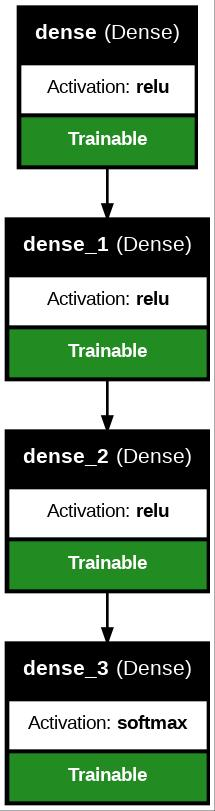

In [10]:
tf.keras.utils.plot_model(model, to_file='gaurav.jpg', show_layer_names=True, dpi=96,show_layer_activations=True,show_trainable=True)

In [11]:
!pip install keras-visualizer --upgrade

In [13]:
from keras_visualizer import visualizer
visualizer(model, file_name='gaurav.pdf', file_format='pdf', view=True)

Optimizer we took adam
If you want to see all optimizers search keras optimizers
https:/keras.io/api/optimizers/adam

Depending upon your problem you can change optimizer, it is hit and run, if you are not getting good accuracy, change optimizer and try

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Verbose=1
Means you see in output how execution hapening, if 0 you wont see, only see finally completed


**The line model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1) is a command often used in training a neural network model with Keras (or TensorFlow’s Keras API). Here’s a breakdown of each component:**

* model.fit(...): This method trains the model for a fixed number of epochs (iterations over the dataset).
* X_train: The input data for training. This is typically a NumPy array or a tensor.
* y_train: The target data (labels) for training.
* epochs=100: Specifies the number of complete passes through the training dataset. In this case, it will train for 100 epochs.
* batch_size=2: Determines the number of samples that will be propagated through the network before updating the model's parameters. A batch size of 5 means that the model will train on 5 samples at a time before updating.
* verbose=1: Controls the verbosity of the output. When set to 1, it displays a progress bar for each epoch. When you put 0 no deatils printed only says completed
when put verbode=2 it shows more details

In [21]:
model.fit(X_train, y_train, epochs=5, batch_size = 2, verbose=1)

Epoch 1/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0218
Epoch 2/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9949 - loss: 0.0136
Epoch 3/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 0.0085
Epoch 4/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9994 - loss: 0.0105
Epoch 5/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9615 - loss: 0.0479


To increase accuract=y, you can increase no of epochs and batch size, even still you cant you can change optimizer

**is used to evaluate the performance of a trained model on test data. Here’s a detailed breakdown of each part:**

* model.evaluate(X_test, y_test): This method computes the loss and any additional metrics (such as accuracy) for the given test data, X_test and y_test, without updating the model weights. It returns a list (or a single scalar if there’s only one metric), with the first element being the loss and the subsequent elements corresponding to the metrics defined when compiling the model.

* scores: The variable scores holds the output of model.evaluate(...). It is an array where:

* scores[0] represents the test loss.
* scores[1] (if accuracy was specified as a metric) represents the model’s accuracy on the test data.
* print('Accuracy is', scores[1]): This line prints out the accuracy of the model on the test set, providing an idea of how well the model generalizes to unseen data.

In [24]:
scores = model.evaluate(X_test, y_test)
print('Accuracy is', scores[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9333 - loss: 0.0591
Accuracy is 0.9333333373069763


what you understand with below output?

* [array([[ 1.2228057e-01,  2.1566279e-01,  3.0752346e-01,  4.9417794e-01,
         -5.8791816e-01,  4.5137504e-01,  2.8881806e-01,  4.1463906e-01],
        [-2.2665098e-01,  1.4995439e-01, -3.3880645e-01,  3.7530783e-01,
         -8.7370324e-01, -6.4420640e-02, -5.1418978e-01,  9.6977997e-01],
        [-8.7850577e-01,  4.2158344e-01,  9.1698331e-01,  1.1014266e-02,
          7.9378921e-01, -7.6284945e-01,  4.1089597e-01,  3.2736834e-02],
        [-9.9352360e-01, -2.8905874e-01,  7.1652347e-01,  6.5948224e-01,
          5.4262751e-01, -3.1413388e-01, -4.0391693e-04, -4.6958011e-01]],
       dtype=float32),
 array([ 0.47647235, -0.11153275, -0.13841335, -0.18478934, -0.0282291 ,
         0.41361824,  0.52477384,  0.39927217], dtype=float32)]

In [25]:
model.layers[0].get_weights()

[array([[ 1.2228057e-01,  2.1566279e-01,  3.0752346e-01,  4.9417794e-01,
         -5.8791816e-01,  4.5137504e-01,  2.8881806e-01,  4.1463906e-01],
        [-2.2665098e-01,  1.4995439e-01, -3.3880645e-01,  3.7530783e-01,
         -8.7370324e-01, -6.4420640e-02, -5.1418978e-01,  9.6977997e-01],
        [-8.7850577e-01,  4.2158344e-01,  9.1698331e-01,  1.1014266e-02,
          7.9378921e-01, -7.6284945e-01,  4.1089597e-01,  3.2736834e-02],
        [-9.9352360e-01, -2.8905874e-01,  7.1652347e-01,  6.5948224e-01,
          5.4262751e-01, -3.1413388e-01, -4.0391693e-04, -4.6958011e-01]],
       dtype=float32),
 array([ 0.47647235, -0.11153275, -0.13841335, -0.18478934, -0.0282291 ,
         0.41361824,  0.52477384,  0.39927217], dtype=float32)]